# HR Analytics Project- Understanding the Attrition in HR

## Project Description

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

## HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic 
processes to the human resource department of an organization in the hope of improving employee performance and 
therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

## Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general,
relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing 
company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

## Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

In [490]:
# Importing required libraries 

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')

In [491]:
# Importing Dataset

hr = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv.',skipinitialspace = True)
hr.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


# Exploratory Data Analysis (EDA)

## Data Pre Processing

In [492]:
# Checking the dimension of the dataset

hr.shape

(1470, 35)

In [493]:
# Checking the sample of the dataset

hr.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1125,29,No,Travel_Frequently,995,Research & Development,2,1,Life Sciences,1,1590,...,4,80,1,6,0,4,6,4,1,3
1077,29,Yes,Travel_Rarely,224,Research & Development,1,4,Technical Degree,1,1522,...,3,80,0,11,2,1,9,7,0,7
609,43,No,Travel_Rarely,589,Research & Development,14,2,Life Sciences,1,843,...,3,80,1,22,3,3,4,1,1,0
1027,34,No,Travel_Rarely,401,Research & Development,1,3,Life Sciences,1,1447,...,1,80,1,7,2,2,5,4,0,2
629,28,No,Travel_Rarely,1169,Human Resources,8,2,Medical,1,869,...,4,80,1,6,6,3,5,1,0,4


In [494]:
# Checking the features present in the dataset

hr.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [495]:
# Checking the datatypes present in the dataset

hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [496]:
# Checking the information of the dataset

hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [497]:
# Checking the unique value present across the features

hr.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [498]:
# Dropping of features 'EmployeeCount', 'Over18','StandardHours'

hr.drop(['EmployeeCount','Over18','StandardHours',],axis=1,inplace = True)
hr.shape

(1470, 32)

In [499]:
# Checking for null values in the dataset

hr.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [500]:
# Splitting the dataset into Categorical and Numerical for Visualization

hr_cat=[]
for i in hr.columns:
    if hr.dtypes[i]=='object':
        hr_cat.append(i)
        
hr_num=[]
for i in hr.columns:
    if hr.dtypes[i]!='object':
        hr_num.append(i)
print('Categorical Column',hr_cat)
print('Numerical Column',hr_num)

Categorical Column ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numerical Column ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


### Observations

Imported required libraries and imported HR Analytics dataset

Used skipinitialspace = True while importing the dataset to clear any whitespaces present in the dataset

Dataset contains 1470 rows and 35 columns

Datatypes present in the dataset are int64(26) and object(9)

Dropped Column 'EmployeeCount','Over18','StandardHours', as it will not be much relevant for model prediction,
moreover only 1 unique value is present in those columns.

After dropping 'EmployeeCount','Over18','StandardHours' columns, dataset contains 1470 rows and 32 columns 

No null values present in the dataset

Splitted Categorical and Numerical columns for data visualization analysis

We will encode the categorical columns present in the dataset, when we proceed to Model Evaluation

Target variable will be 'Attrition', where we need to create a Model to predict Attrition of the employees with the
given features and Classification algorithm will be used to develop the Model.

# Data Visualization Analysis

<AxesSubplot:>

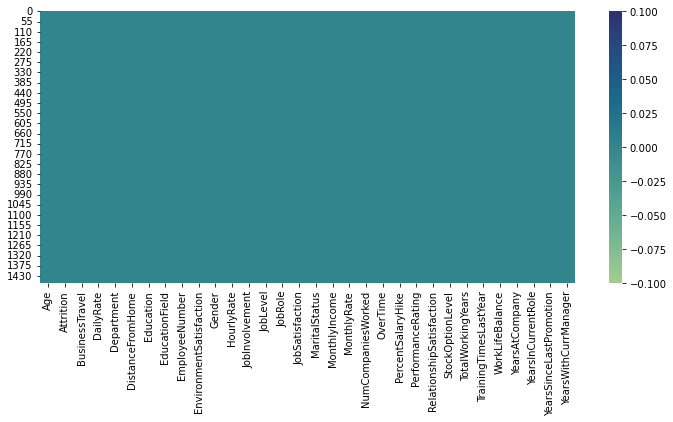

In [501]:
# Visualizing the null values in heatmap

plt.figure(figsize=(12,5))
sns.heatmap(hr.isnull(),cmap="crest")

Visualizing the dataset with heatmap to see if there are any null values present in the dataset

No null values present in the dataset

# Univariate Analysis

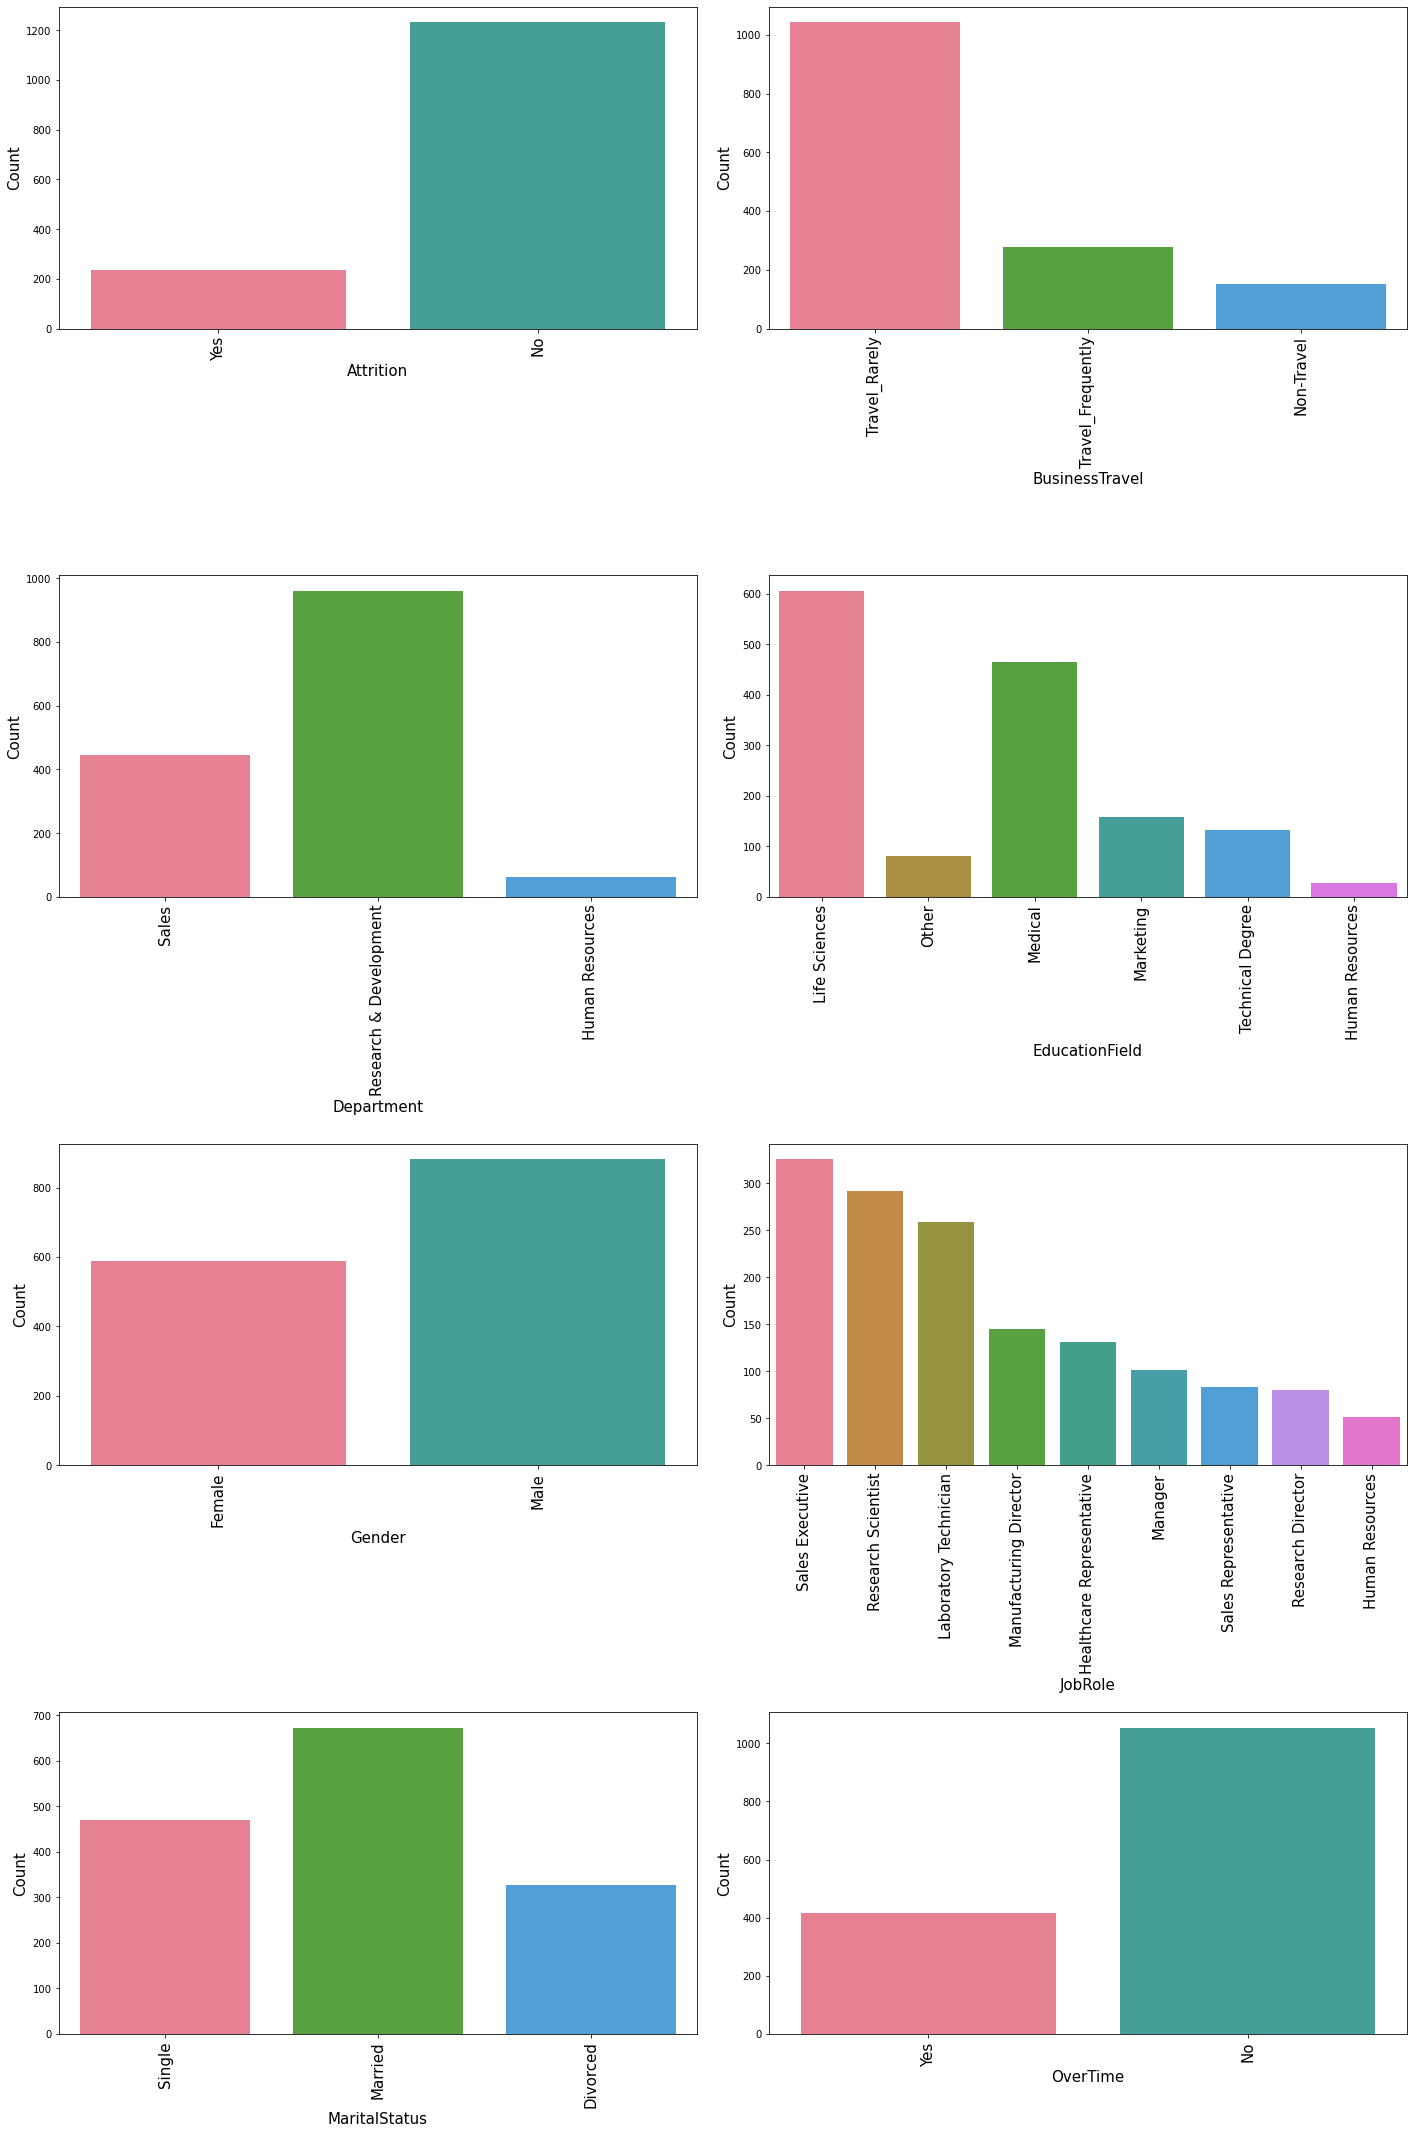

In [502]:
# Visualizing categorical columns with 'countplot'

plt.figure(figsize=(20,30))
plot_number=1
for i in hr_cat:
    if plot_number <=8:
        ax=plt.subplot(4,2,plot_number)
        sns.countplot(hr[i],palette="husl")
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=15,rotation=90)
        plt.ylabel('Count',fontsize=15)
        plt.tight_layout(pad=2.0)
    plot_number+=1
plt.show()

## Observations:
    
We can observe target feature attrition is 'No' with 1233 counts and 'Yes' 237 count

Employee who travels rarely for business travel count is higher than frequent and non travel employees

Department with maximum employees are in Research & Development followed by sales

Employees with life science education background is higher followed by medical and marketing

Male employees are higher then female employees

Employees job role in sales executive count is highest followed by research scientist, lab technician and lowest count in HR

Married employees are higher than Single and Divorced

Higher number of employees are not rendering overtime when compared with employees who do overtime

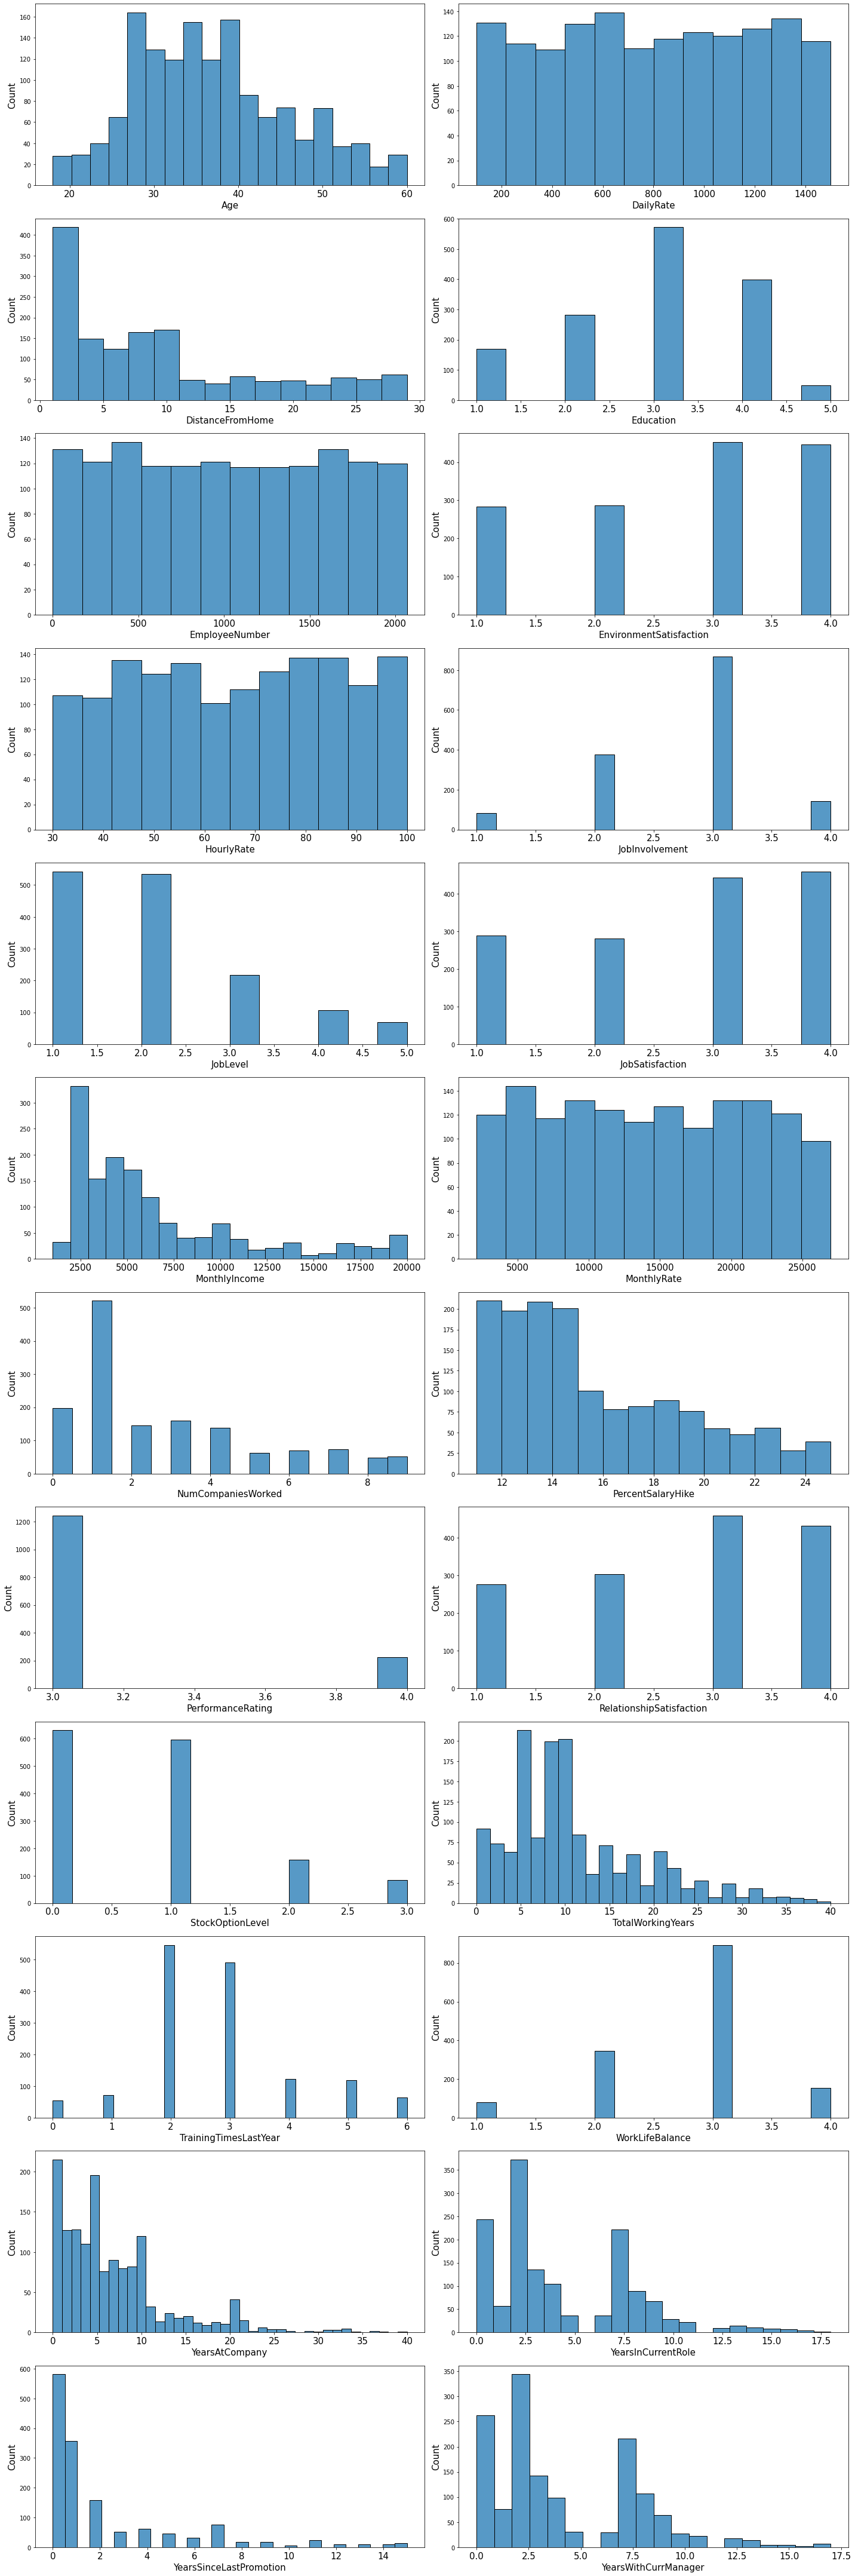

In [503]:
# Visualizing numerical columns with 'histplot'

plt.figure(figsize=(20,60))
plot_number=1
for i in hr_num:
    if plot_number <=24:
        ax=plt.subplot(12,2,plot_number)
        sns.histplot(hr[i],palette="husl")
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=15)
        plt.ylabel('Count',fontsize=15)
        plt.tight_layout(pad=2.0)
    plot_number+=1
plt.tight_layout()

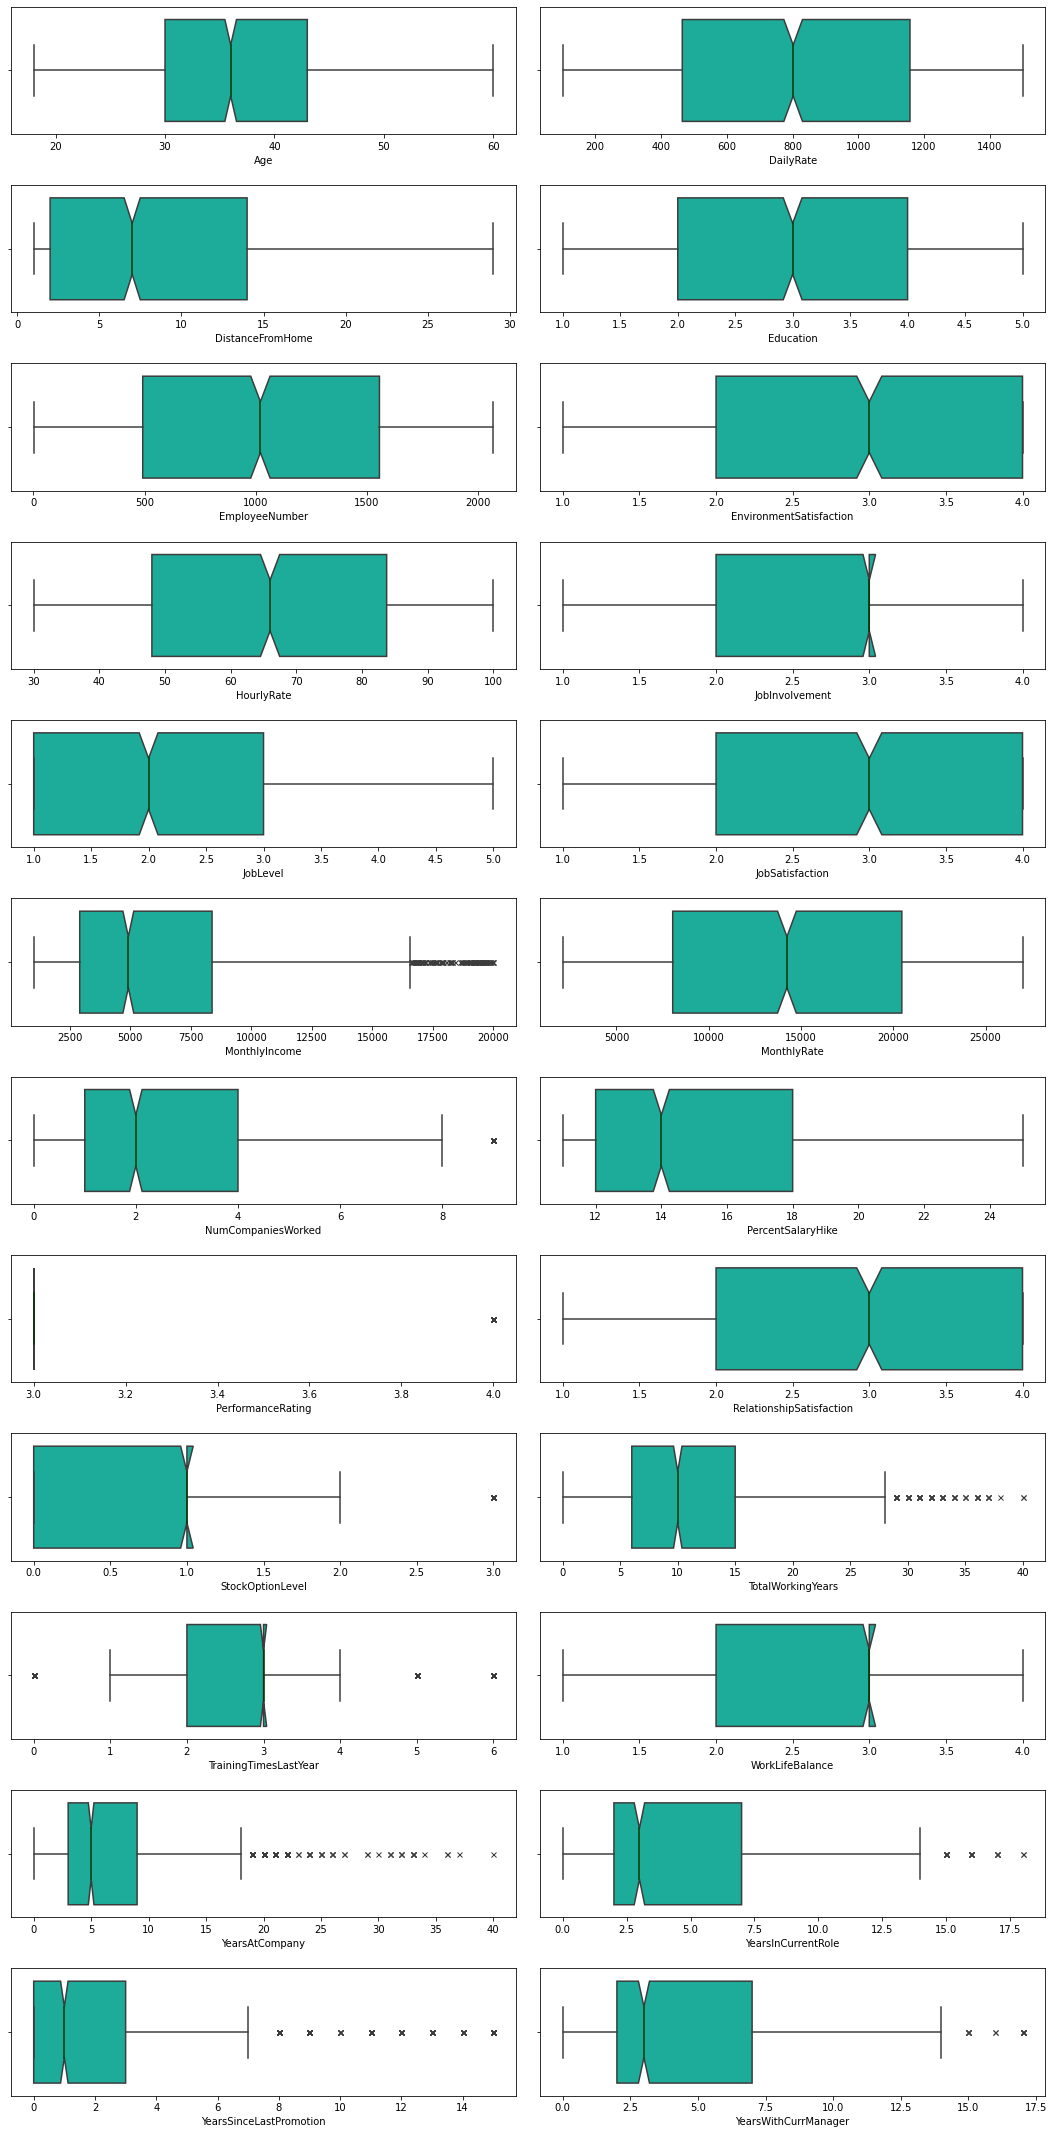

In [504]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(15,30))
st = 1
for i in hr_num:
    if st <=24:
        sub = plt.subplot(12,2,st)
        sns.boxplot(hr[i],color='#06c2ac',notch=True,
                    medianprops={"color": "#033500"},flierprops={"marker": "x"})
        plt.xlabel(i,fontsize=10)
        plt.tight_layout(pad=2.0)
    st+=1
plt.show()

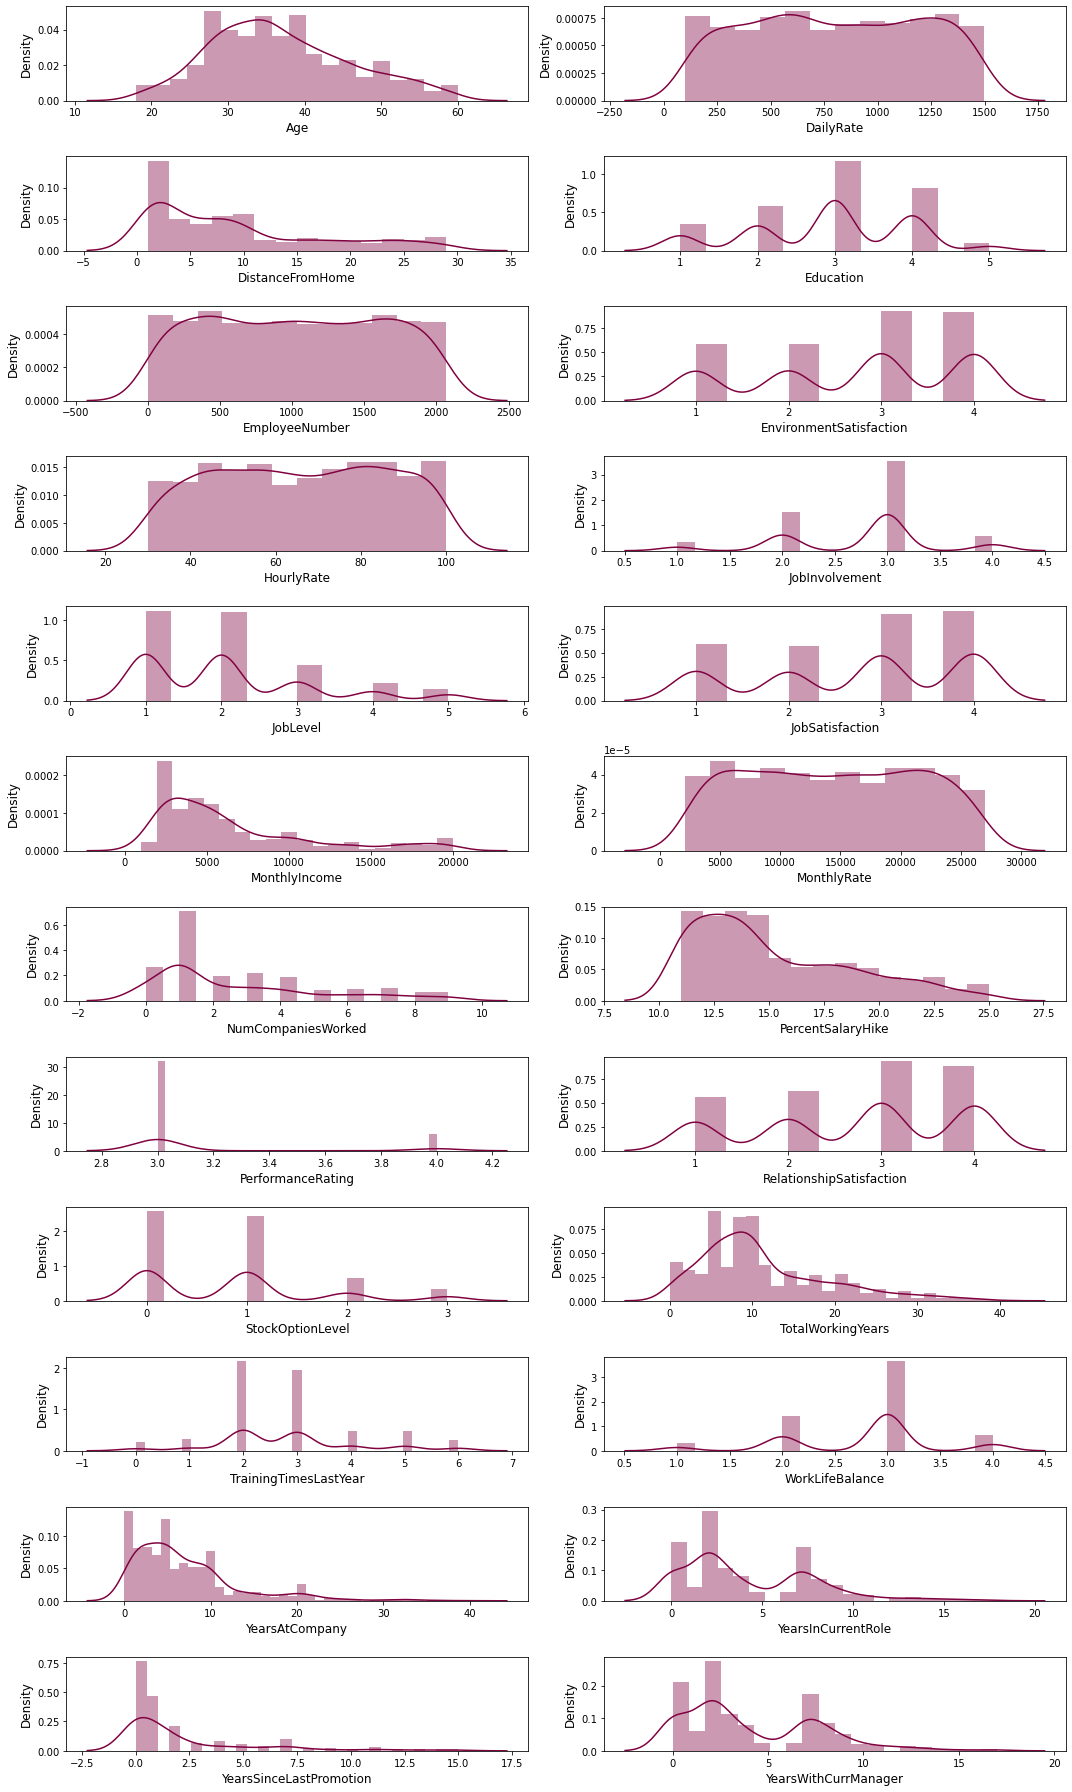

In [505]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(15,25))
plot_number=1
for i in hr_num:
    if plot_number <=24:
        ax=plt.subplot(12,2,plot_number)
        sns.distplot(hr[i],color="#80013f")
        plt.xlabel(i,fontsize=12)
        plt.ylabel('Density',fontsize=12)
        plot_number+=1
        plt.tight_layout(pad=2.0)
plt.tight_layout()

### Observations

Employee age group in mid 20’s to 40 are higher compared with other age groups

Employees with daily wages of 600 is high followed by 1300, 500 and 200 

Most of the employees distance from home is within 10kms

Employees with education level 3 and 4 are higher 

Employee with Environment satisfaction level 3 and 4 are higher 

Employee who gets hourly rate of 100, 85, 80, 55 and 45 are higher compared with others

Maximum number of employees got 3.0 for job involvement 

Employees with job level 1 and 2 are higher

Maximum employees have rated job satisfaction as 4 and 3

Employees with monthly income of 2500 is highest and most of the employees ranges between 2500 to 11000 

Monthly rate is higher with 5000

Number of companies worked by employees is maximum with 1 and 0 followed by 2,3 and 4

Employees with 11% to 15% of salary hike is maximum 

People who got performance rating of 3 is higher than 4

Employees relationship satisfaction is higher at 3 and 4

Most of the employees dont have Stock option level

Employees with Total working years of 10 is maximum followed by 6, 8,5 and 1

Maximum training time spent during last year was 2 and 3

Employees who rated work life balance as 3 is maximum

Employees with 0 to 1 years at the current organization is highest followed by 4 to 5

Employees in current role is comparatively higher in 2 to 2.5 and 7 to 7.5 years

Years since last promotion is maximum below 2, which means employees would have promoted recently otherwise freshers

Years with current manager is more similar with years in current role with higher count in 2 to 2.5 and 7 to 7.5 years

Using Boxplot we can observe Outliers are present in the following features Monthly income, No of companies worked, Performance Rating, Stock option level, Total working years, Training time last year, Years at company, Years in current role, Years since last promotion,
Years with current manager

By using distplot on numerical columns we can observe features are skewed towards right and left

Following features are skewed towards right
DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, StockOptionLevel, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole,
YearsSinceLastPromotion, YearsWithCurrManager

Following features are skewed towards left
EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, WorkLifeBalance

# Bivariate and Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1080x2160 with 0 Axes>

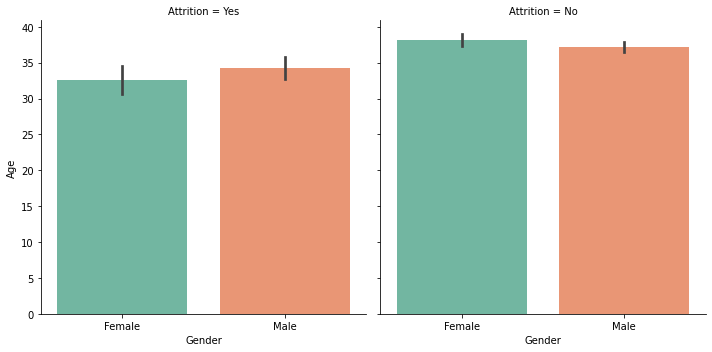

In [506]:
# Visualizing Attrition Vs Gender Vs Age using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="Gender", y="Age", col="Attrition",kind="bar",palette='Set2')
plt.show

### Observations

People with age group below 35 are maximum in attrition

Male are higher than female in attrition

Female are higher than Male who are not in attrition

<Figure size 1080x2160 with 0 Axes>

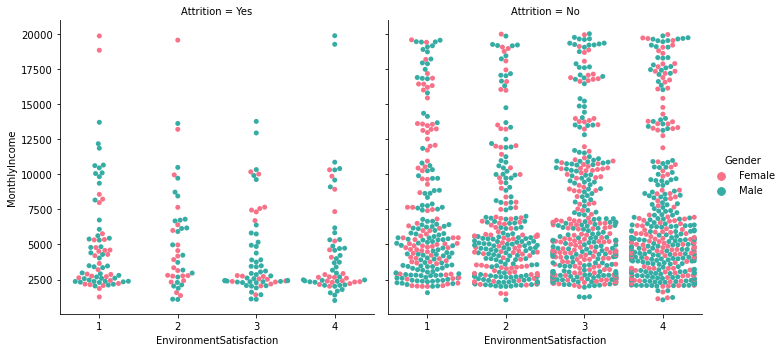

In [507]:
# Visualizing Attrition Vs EnvironmentSatisfaction Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="EnvironmentSatisfaction", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')


### Observations

We can observe attrition increasing for employees who rated environment satisfaction as 1

Moreover most of the attritions are coming from employees with low monthly income

<Figure size 1080x2160 with 0 Axes>

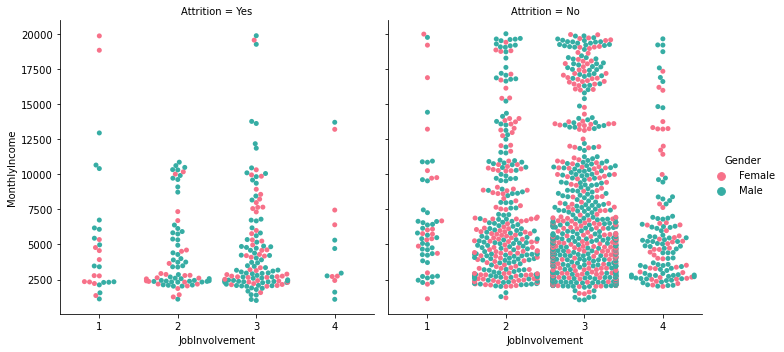

In [508]:
# Visualizing Attrition Vs JobInvolvement Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="JobInvolvement", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')


### Observations

In above visualization we can observe employee rated with job involvement of 3 is maximum in attrition, also maximum
count is with employees with low income.

<Figure size 1080x2160 with 0 Axes>

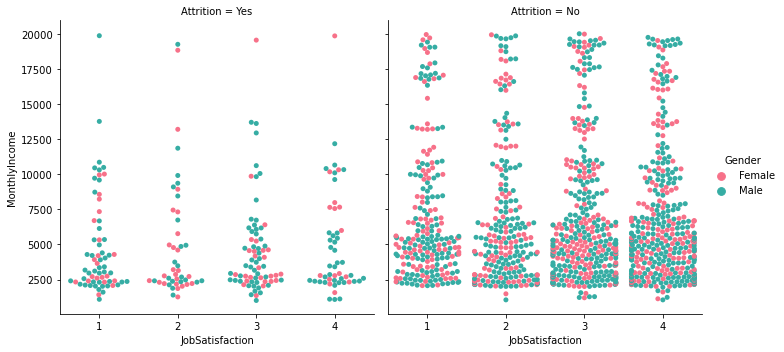

In [509]:
# Visualizing Attrition Vs JobSatisfaction Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="JobSatisfaction", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

Here also we can see employees who rated 1 and 3 as job satisfaction are getting low monthly income, which causes attrition

<Figure size 1080x2160 with 0 Axes>

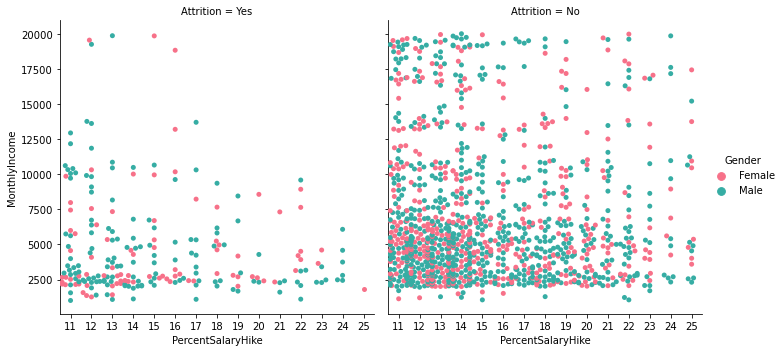

In [510]:
# Visualizing Attrition Vs PercentSalaryHike Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="PercentSalaryHike", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

Employees with 11% to 15% of salary hike is the maximum category for attrition who gets monthly income low

<Figure size 1080x2160 with 0 Axes>

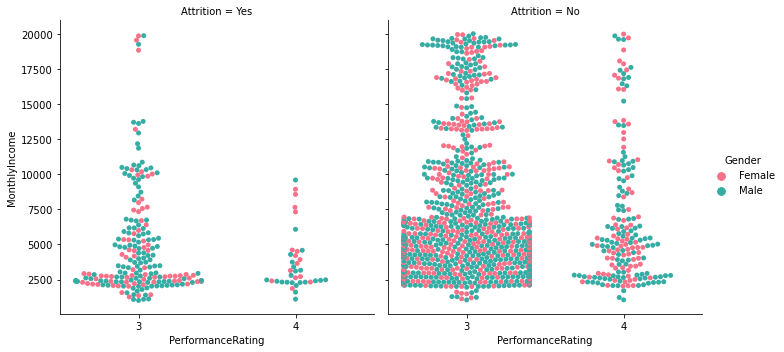

In [511]:
# Visualizing Attrition Vs PerformanceRating Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="PerformanceRating", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

People who got performance rating of 3 is higher than 4 

<Figure size 1800x2880 with 0 Axes>

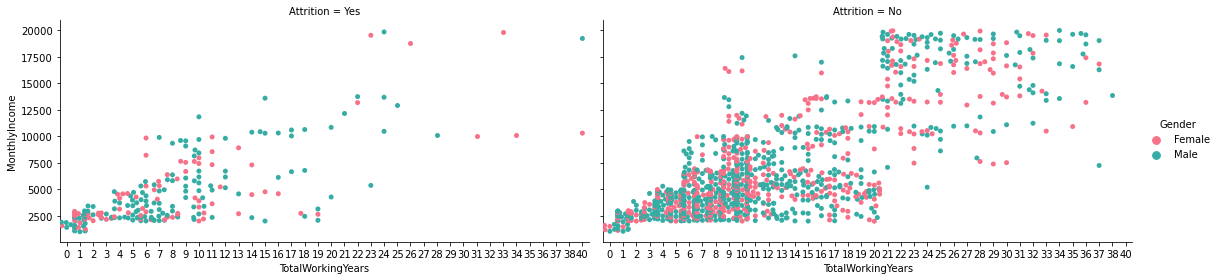

In [512]:
# Visualizing Attrition Vs TotalWorkingYears Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(25,40))
fx=sns.catplot(data=hr, x="TotalWorkingYears", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl',height=4, aspect=2)

### Observations

Employees with Total working years of 10 is maximum followed by 6, 8,5 and 1, who are in low montly income category

<Figure size 1080x2160 with 0 Axes>

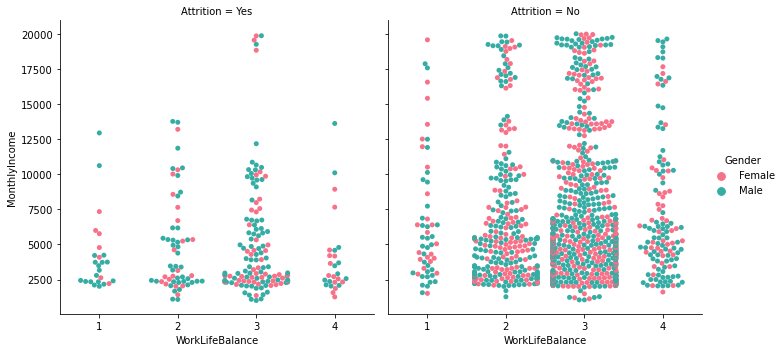

In [513]:
# Visualizing Attrition Vs WorkLifeBalance Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="WorkLifeBalance", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

Employees who rated work life balance as 3 is maximum

<Figure size 1080x2160 with 0 Axes>

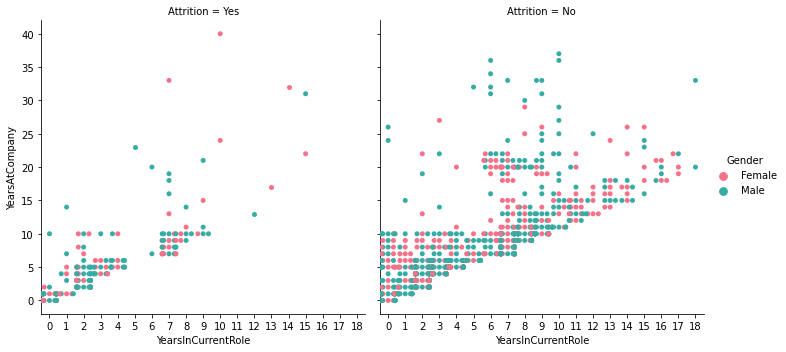

In [514]:
# Visualizing Attrition Vs YearsInCurrentRole Vs YearsAtCompany Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="YearsInCurrentRole", y="YearsAtCompany", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

Employees with 0 to 1 years at the current organization is highest followed by 4 to 5

Employees in current role is comparatively higher in 2 to 2.5 and 7 to 7.5 years

All these employees are getting low monthly income which is mostly below 15000

<Figure size 1080x2160 with 0 Axes>

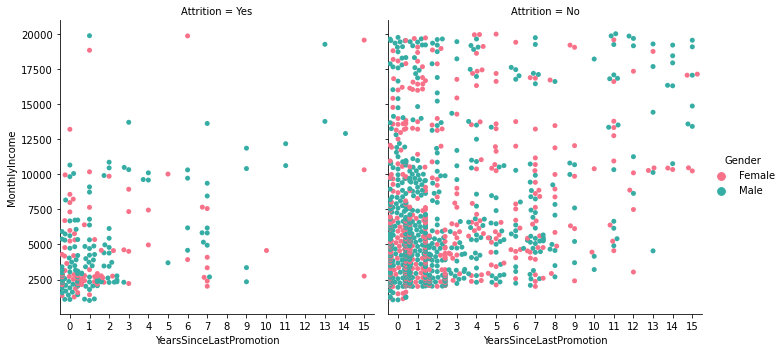

In [515]:
# Visualizing Attrition Vs YearsSinceLastPromotion Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="YearsSinceLastPromotion", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

Years since last promotion is maximum below 2, which means employees would have promoted recently otherwise freshers

<Figure size 1080x2160 with 0 Axes>

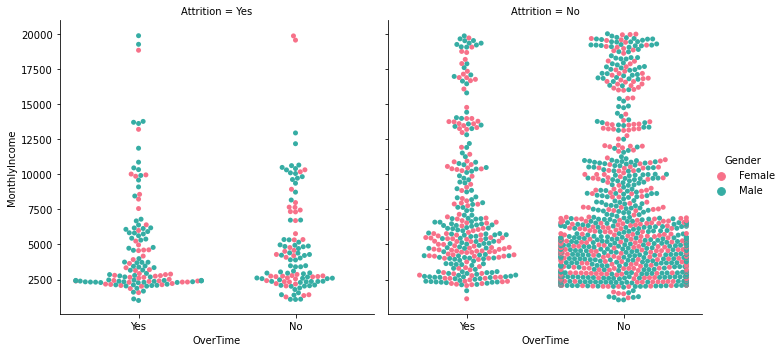

In [516]:
# Visualizing Attrition Vs OverTime Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="OverTime", y="MonthlyIncome", col="Attrition",
               hue="Gender",kind="swarm",palette='husl')

### Observations

Employees who have done overtime more is high in attrition, which may be one of the cause due to work overload

<Figure size 1080x2160 with 0 Axes>

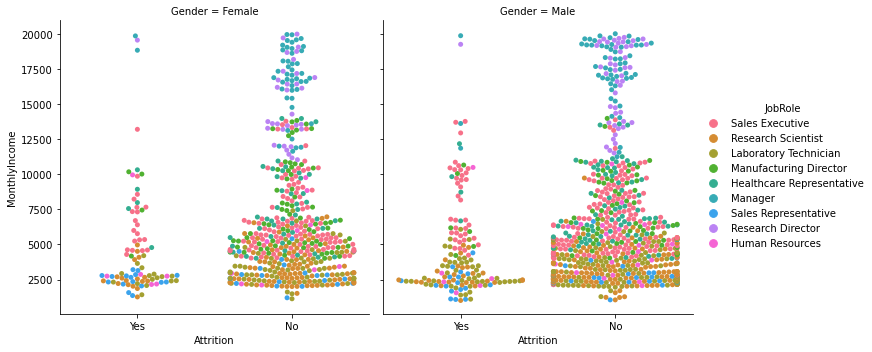

In [517]:
# Visualizing Attrition Vs JobRole Vs MonthlyIncome Vs Gender using catplot

plt.figure(figsize=(15,30))
fx=sns.catplot(data=hr, x="Attrition", y="MonthlyIncome", col="Gender",
               hue="JobRole",kind="swarm",palette='husl')

### Observations

Employees job role in sales executive, research scientist, lab technician contributes high in attrition. also their monthly
income is low

# Data Feature Selection and Engineering

## Label Encoding

In [518]:
# Label encoding categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in hr.columns:
    if (hr[i].dtypes=='object'):
        hr[i]=le.fit_transform(hr[i].values.reshape(-1,1))

In [519]:
hr.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1288,35,0,0,1180,1,2,2,3,1804,2,...,3,3,1,15,6,3,7,7,1,7
247,34,0,2,470,1,2,4,1,339,4,...,3,2,1,13,3,3,11,9,5,9
789,44,1,2,1376,0,1,2,3,1098,2,...,3,4,1,24,1,3,20,6,3,6
1173,36,0,2,711,1,5,4,1,1651,2,...,3,3,2,9,6,3,3,2,0,2
1035,31,0,2,1398,0,8,2,3,1461,4,...,3,4,0,8,3,3,3,2,0,2


### Observations

Encoded categorical columns 'type' and 'region' using label encoder for further analysis

Attrition which is our target feature contains 1233 - '0' and 237 -'1', which shows imbalance in target variable

# Describe - Statistic Summary

In [520]:
# Checking the datset with describe function

hr.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
Attrition,1470.0,0.161224,0.367863,0.0,0.00,0.0,0.00,1.0
BusinessTravel,1470.0,1.607483,0.665455,0.0,1.00,2.0,2.00,2.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
Department,1470.0,1.260544,0.527792,0.0,1.00,1.0,2.00,2.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EducationField,1470.0,2.247619,1.331369,0.0,1.00,2.0,3.00,5.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0


### Observations

Count is same across all the columns stating no missing values

Mean is greater than median(50%) in columns DistanceFromHome, JobLevel, MonthlyIncome, NumCompaniesWorked, PercentSalaryHike, PerformanceRating, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager
which shows data is skewed towards right side

Also we can see the difference between 75% to max are high in Age,DailyRate,EmployeeNumber,HourlyRate,Monthly Income
No of companies worked,Total working years, Years at company, Years in current role, Years since last promotion, Years with current manager
columns which indicates outliers are present

Employee Number column is more of a Serial Number or unique ID, so we can drop that column, it will not be much
relevant for Model Prediction

In [521]:
# Droppping 'Employee Number' column

hr.drop(['EmployeeNumber'],axis=1,inplace=True)

In [522]:
# Checking the dimension of the dataset after dropping 'Employee Number'

hr.shape

(1470, 31)

## Correlation Analysis

<AxesSubplot:>

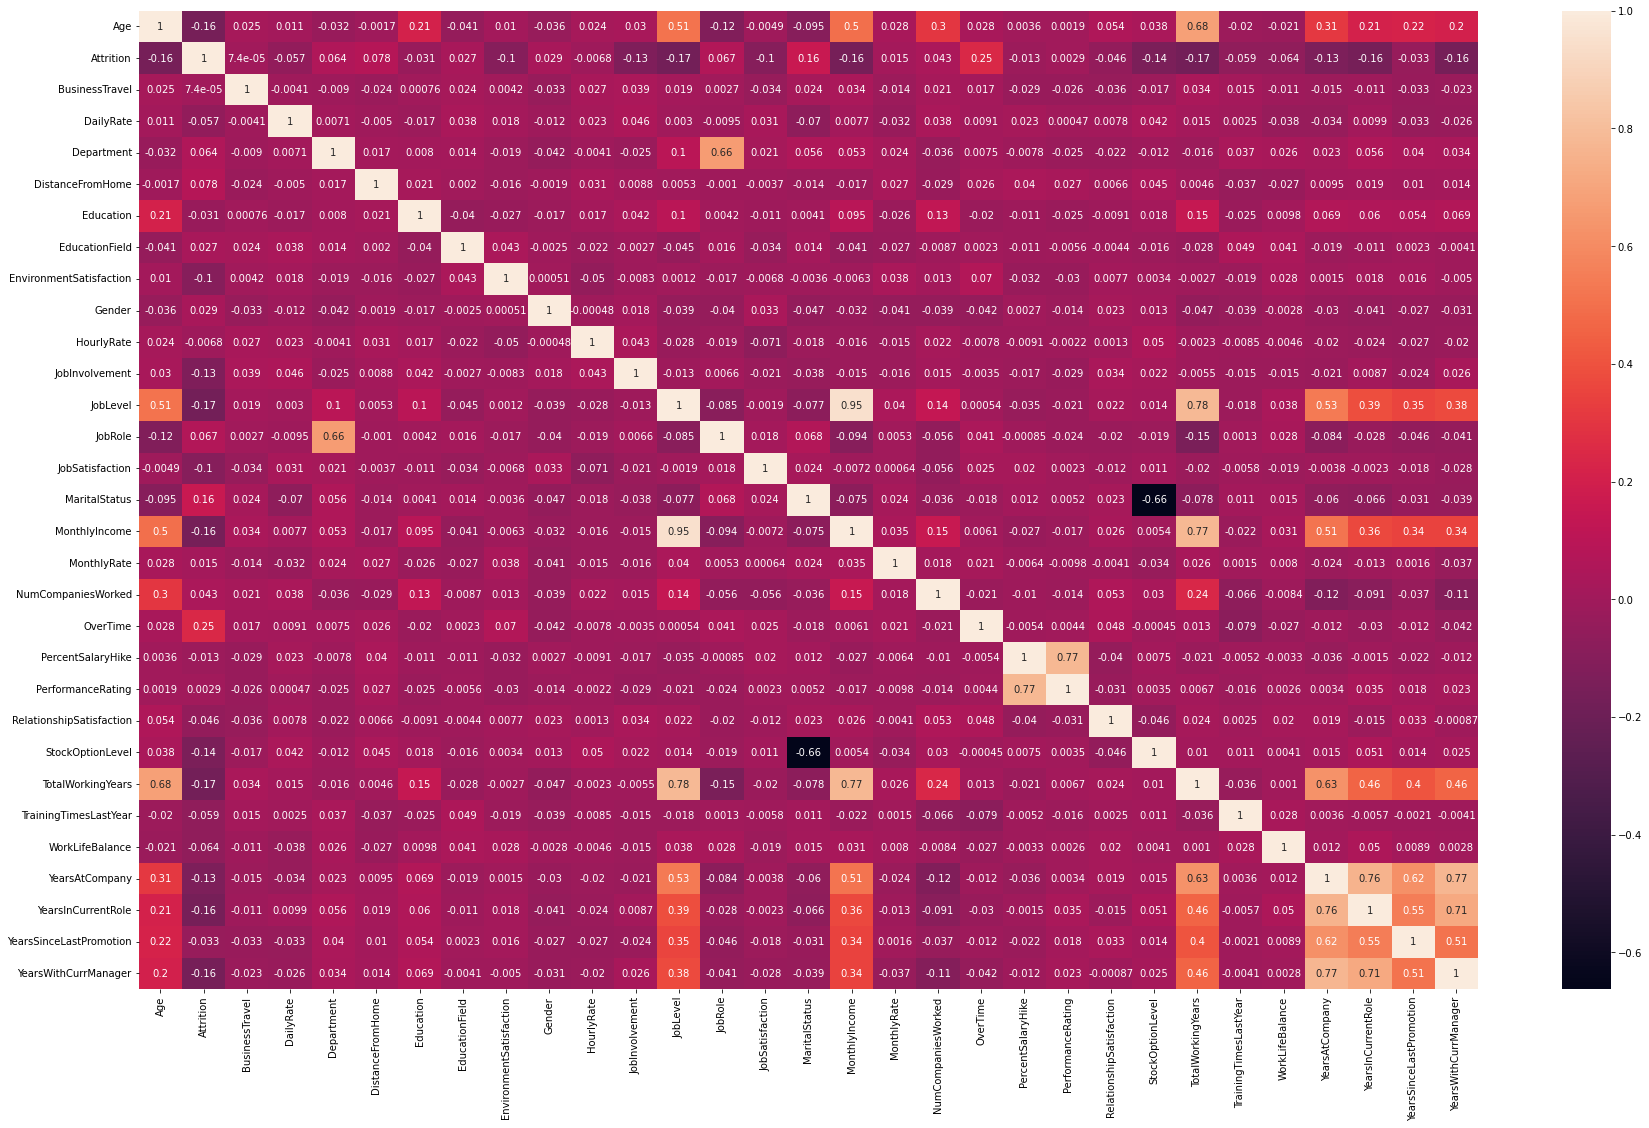

In [523]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(30,18))
sns.heatmap(hr.corr(),annot=True)

<function matplotlib.pyplot.show(close=None, block=None)>

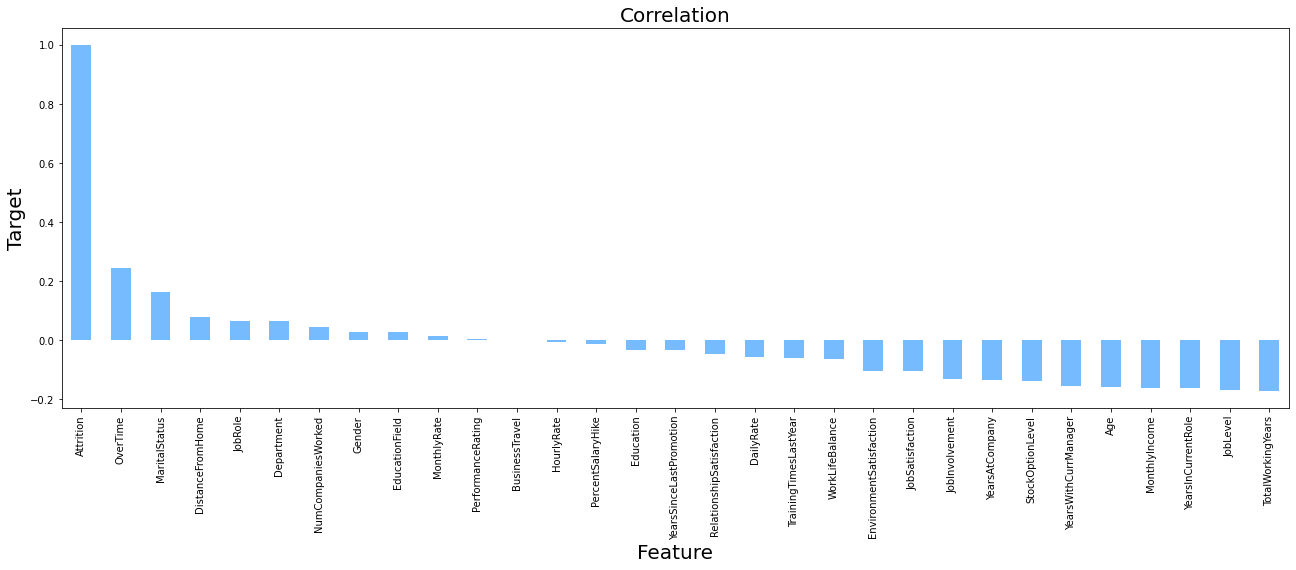

In [524]:
# Checking Correlation of the input attributes with the Target variable by Bar Plot

plt.figure(figsize=(22,7))
hr.corr()['Attrition'].sort_values(ascending=False).plot(kind='bar',color='#75bbfd')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

### Observation

TotalWorkingYears,JobLevel,YearsInCurrentRole,MonthlyIncome,Age,YearsWithCurrManager,StockOptionLevel,YearsAtCompany
JobInvolvement,JobSatisfaction,EnvironmentSatisfaction,WorkLifeBalance,TrainingTimesLastYear,DailyRate,percent,
RelationshipSatisfaction,YearsSinceLastPromotion,Education,PercentSalaryHike and hourly rate are negatively correlated 
with target variable Attrition

BusinessTravel,PerformanceRating,MonthlyRate,EducationField,Gender,NumCompaniesWorked,Department,JobRole,DistanceFromHome
MaritalStatus,OverTime are positively correlated with Target variable

Moreover StockOptionLevel and MaritalStatus are highly negatively correlated to each other 

# Outliers Treatment with Zscore

In [562]:
# Removing outliers using Z score for Numerical Columns

from scipy.stats import zscore

col=['Age','DailyRate','DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate',
       'JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','NumCompaniesWorked',
       'PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears',
       'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion',
       'YearsWithCurrManager']

z1 = hr[col]
z1.head()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2


In [563]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([  28,   45,   62,   62,   63,   64,   85,   98,   98,  110,  123,
        123,  123,  126,  126,  126,  153,  178,  187,  187,  190,  190,
        218,  231,  231,  237,  237,  270,  270,  281,  326,  386,  386,
        401,  411,  425,  425,  427,  445,  466,  473,  477,  535,  561,
        561,  584,  592,  595,  595,  595,  616,  624,  635,  653,  653,
        677,  686,  701,  716,  746,  749,  752,  799,  838,  861,  861,
        875,  875,  894,  914,  914,  918,  922,  926,  926,  937,  956,
        962,  976,  976, 1008, 1024, 1043, 1078, 1078, 1086, 1086, 1093,
       1111, 1116, 1116, 1135, 1138, 1138, 1156, 1184, 1221, 1223, 1242,
       1295, 1301, 1301, 1303, 1327, 1331, 1348, 1351, 1401, 1414, 1430],
      dtype=int64), array([22, 21, 19, 21, 20, 21, 16, 16, 19, 21, 20, 21, 22, 16, 19, 21, 22,
       21, 16, 22, 19, 20, 21, 20, 22, 19, 21, 16, 19, 20, 21, 21, 22, 16,
       19, 19, 21, 21, 16, 20, 19, 19, 21, 19, 22, 21, 19, 16, 19, 21, 22,
       16, 22, 19, 21, 

In [564]:
hr_new = hr[(z<3).all(axis=1)]

In [565]:
hr.shape

(1470, 31)

In [566]:
hr_new.shape

(1387, 31)

In [567]:
# Checking the dataloss

dataloss = (1470-1387)/1470*100
dataloss

5.646258503401361

### Observations

After applying z score to remove outliers, data loss is at 5.64% which is in acceptable range.

## Skewness

In [568]:
# Checking Skewness 

hr_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [569]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['DistanceFromHome','JobLevel','MonthlyIncome','NumCompaniesWorked','PercentSalaryHike',
       'StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole',
       'YearsSinceLastPromotion','YearsWithCurrManager']


pt = PowerTransformer(method='yeo-johnson',standardize=False)
hr_new[skew] = pt.fit_transform(hr_new[skew].values)

In [570]:
# Checking Skewness  after applying power transform

hr_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome           -0.008149
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    0.110769
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.557100
Y

In [571]:
# Applying log method to reduce skewness

hr_new['PerformanceRating'] = np.log(hr_new['PerformanceRating'])

In [572]:
# Applying sqrt method to reduce skewness

hr_new['PerformanceRating'] = np.sqrt(hr_new['PerformanceRating'])

In [573]:
# Applying cbrt method to reduce skewness

hr_new['PerformanceRating'] = np.cbrt(hr_new['PerformanceRating'])

### Observations

Applied power transform yeo- johnson method to reduce skewness and most of the columns skewness reduced, except
We can see skewness is above threshold of +/- 0.5 in features 'Attrition','BusinessTravel','OverTime' and 
'PerformanceRating'

We will not apply power transform method as these features are categorical and label encoded
'Attrition','BusinessTravel','OverTime', moreover 'Attrition' is our target column.

For feature 'PerformanceRating' applied log method to reduce skewness and there is a slight reduction.

Tried with sqrt,cbrt method but skewness is not reduced, hence will drop the feature performance rating

In [574]:
# Dropping column performance rating

hr_new.drop(['PerformanceRating'],axis=1,inplace = True)

In [575]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = hr_new.drop("Attrition",axis=1)
x.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
336,29,2,318,1,2.254628,4,4,2,1,77,...,0.711293,4,-0.000000,3.079851,2.737609,2,2.635316,2.794574,-0.000000,2.727090
180,31,2,140,1,2.643402,1,3,3,0,95,...,0.726680,3,0.602674,3.079851,0.000000,3,1.930406,1.280069,-0.000000,1.264277
818,31,1,793,2,3.155472,3,1,3,1,67,...,0.713892,1,0.602674,1.792238,2.737609,3,1.242409,1.280069,0.803607,1.264277
375,49,2,1261,1,2.130808,3,4,2,1,31,...,0.727211,3,-0.000000,6.270687,1.565305,3,2.195252,1.280069,-0.000000,0.000000
183,50,2,328,1,0.698793,3,3,3,1,86,...,0.719452,4,0.602674,2.506660,1.565305,2,1.620359,1.280069,-0.000000,1.264277


In [576]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

     VIF Factor                  Features
0     33.361956                       Age
1      6.891988            BusinessTravel
2      5.122601                 DailyRate
3     14.508294                Department
4      6.254718          DistanceFromHome
5      9.547690                 Education
6      3.931503            EducationField
7      7.399797   EnvironmentSatisfaction
8      2.574715                    Gender
9     11.814028                HourlyRate
10    16.150195            JobInvolvement
11   149.003971                  JobLevel
12     8.628186                   JobRole
13     7.372410           JobSatisfaction
14     7.555903             MaritalStatus
15  7103.435201             MonthlyIncome
16     5.234842               MonthlyRate
17     5.337399        NumCompaniesWorked
18     1.438500                  OverTime
19  5668.532764         PercentSalaryHike
20     7.397518  RelationshipSatisfaction
21     4.952143          StockOptionLevel
22    29.810311         TotalWorki

In [578]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['Age','HourlyRate','JobInvolvement','JobLevel','MonthlyIncome','PercentSalaryHike','TotalWorkingYears',
     'WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsWithCurrManager']

st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
891,0.876217,2,1117,1,1.112840,1,1,1,0,0.303496,...,-0.508918,4,0.602674,0.147620,3.252793,0.336558,0.948319,0.557497,1.185735,1.018073
755,0.989396,2,1234,2,2.558493,2,1,4,0,1.191365,...,-0.508918,2,0.602674,1.900415,2.737609,1.755424,0.791264,-0.018738,0.566648,-0.821722
791,-0.142391,2,1204,2,1.640095,3,5,4,1,0.994061,...,1.569155,1,-0.000000,-0.007630,1.565305,0.336558,0.621429,1.006575,1.030477,1.018073
470,-1.387358,1,535,2,3.343068,3,3,4,1,-1.373591,...,-0.508918,3,0.882962,-1.259739,2.180336,0.336558,-0.933983,-0.390769,0.803607,-0.821722
688,-1.953252,2,419,2,3.205451,3,4,4,1,-1.422917,...,-0.508918,2,-0.000000,-1.969680,2.180336,1.755424,-1.419662,-1.571814,-0.000000,-1.528426


In [579]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor                  Features
0     1.859839                       Age
1     6.348848            BusinessTravel
2     4.870676                 DailyRate
3    14.200203                Department
4     5.898730          DistanceFromHome
5     8.508510                 Education
6     3.826560            EducationField
7     6.939389   EnvironmentSatisfaction
8     2.490869                    Gender
9     1.023538                HourlyRate
10    1.019332            JobInvolvement
11    5.978131                  JobLevel
12    8.622109                   JobRole
13    6.817675           JobSatisfaction
14    6.599868             MaritalStatus
15    5.844850             MonthlyIncome
16    4.934733               MonthlyRate
17    5.115074        NumCompaniesWorked
18    1.432791                  OverTime
19    1.017485         PercentSalaryHike
20    6.804288  RelationshipSatisfaction
21    4.380100          StockOptionLevel
22    4.091157         TotalWorkingYears
23    7.349899  

In [580]:
#Dropping column Department due to high VIF

x.drop(['Department'],axis=1,inplace=True)

### Observations

After applying scaling method we can observe VIF reduced in all the columns except Department, hence dropped the
column

## Applying SMOTE technique

In [397]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [581]:
from imblearn.over_sampling import SMOTE

In [583]:
# Applying SMOTE technique 

smt = SMOTE()

x2,y2 = smt.fit_resample(x,y)

In [584]:
y2.value_counts()

1    1158
0    1158
Name: Attrition, dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

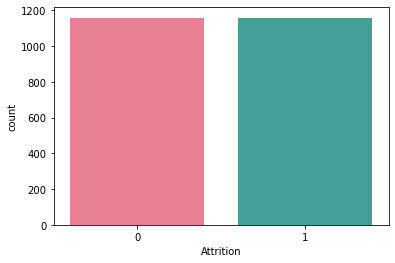

In [586]:
sns.countplot(y2,palette='husl')

### Observations

Applied SMOTE technique to balance the Target Variable Attrition

Above countplot shows target variable is equal in both the category

# Model Evaluation

In [587]:
# Splitting X and Y variables for ModelTesting

x2.shape

(2316, 28)

In [588]:
y2.shape

(2316,)

In [589]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Finding Random State

In [590]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30,random_state=i)
    lr = LogisticRegression()
    lr.fit(x2_train,y2_train)
    predlr = lr.predict(x2_test)
    acc = accuracy_score(y2_test,predlr)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 80.28776978417265 on Random State 53


Best Random state is 53 with .30(30%) as test size

# Train and Split

In [591]:
# Training the Model with .30 as test size and random state at 53

x2_train,x2_test,y2_train,y2_test = train_test_split(x2,y2,test_size=.30, random_state=53)

In [592]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# GaussianNB

In [593]:
GB = GaussianNB()
GB.fit(x2_train,y2_train)
print(GB.score(x2_train,y2_train))
GB_predict = GB.predict(x2_test)
cr1 = cross_val_score(GB,x2,y2,cv=5)

    
print(accuracy_score(y2_test,GB_predict)*100)
print(confusion_matrix(y2_test,GB_predict))
print(classification_report(y2_test,GB_predict))
print('CV score of GaussianNB:',cr1.mean()*100)

0.7316471314003702
76.40287769784173
[[256  85]
 [ 79 275]]
              precision    recall  f1-score   support

           0       0.76      0.75      0.76       341
           1       0.76      0.78      0.77       354

    accuracy                           0.76       695
   macro avg       0.76      0.76      0.76       695
weighted avg       0.76      0.76      0.76       695

CV score of GaussianNB: 73.57795859089894


# SVC

In [594]:
SV = SVC()
SV.fit(x2_train,y2_train)
print(SV.score(x2_train,y2_train))
SV_predict = SV.predict(x2_test)
cr2 = cross_val_score(SV,x2,y2,cv=5)

    
print(accuracy_score(y2_test,SV_predict)*100)
print(confusion_matrix(y2_test,SV_predict))
print(classification_report(y2_test,SV_predict))
print('CV score of SVC:',cr2.mean()*100)

0.5163479333744602
48.489208633093526
[[281  60]
 [298  56]]
              precision    recall  f1-score   support

           0       0.49      0.82      0.61       341
           1       0.48      0.16      0.24       354

    accuracy                           0.48       695
   macro avg       0.48      0.49      0.42       695
weighted avg       0.48      0.48      0.42       695

CV score of SVC: 50.129868920831164


# LogisticRegression

In [595]:
LR = LogisticRegression()
LR.fit(x2_train,y2_train)
print(LR.score(x2_train,y2_train))
LR_predict = LR.predict(x2_test)
cr3 = cross_val_score(LR,x2,y2,cv=5)
    
print(accuracy_score(y2_test,LR_predict)*100)
print(confusion_matrix(y2_test,LR_predict))
print(classification_report(y2_test,LR_predict))
print('CV score of LogisticRegression:',cr3.mean()*100)

0.7587908698334361
80.28776978417265
[[287  54]
 [ 83 271]]
              precision    recall  f1-score   support

           0       0.78      0.84      0.81       341
           1       0.83      0.77      0.80       354

    accuracy                           0.80       695
   macro avg       0.80      0.80      0.80       695
weighted avg       0.81      0.80      0.80       695

CV score of LogisticRegression: 75.47646533104938


# RandomForestClassifier

In [596]:
RFC = RandomForestClassifier()
RFC.fit(x2_train,y2_train)
print(RFC.score(x2_train,y2_train))
RFC_predict = RFC.predict(x2_test)
cr4 = cross_val_score(RFC,x2,y2,cv=5)
    
print(accuracy_score(y2_test,RFC_predict)*100)
print(confusion_matrix(y2_test,RFC_predict))
print(classification_report(y2_test,RFC_predict))
print('CV score of RandomForestClassifier:',cr4.mean()*100)

1.0
92.23021582733813
[[333   8]
 [ 46 308]]
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       341
           1       0.97      0.87      0.92       354

    accuracy                           0.92       695
   macro avg       0.93      0.92      0.92       695
weighted avg       0.93      0.92      0.92       695

CV score of RandomForestClassifier: 90.08127280852015


# DecisionTreeClassifier

In [597]:
DTC = DecisionTreeClassifier()
DTC.fit(x2_train,y2_train)
print(DTC.score(x2_train,y2_train))
DTC_predict = DTC.predict(x2_test)
cr5 = cross_val_score(DTC,x2,y2,cv=5)
    
print(accuracy_score(y2_test,DTC_predict)*100)
print(confusion_matrix(y2_test,DTC_predict))
print(classification_report(y2_test,DTC_predict))
print('CV score of DecisionTreeClassifier:',cr5.mean()*100)

1.0
84.89208633093526
[[289  52]
 [ 53 301]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85       341
           1       0.85      0.85      0.85       354

    accuracy                           0.85       695
   macro avg       0.85      0.85      0.85       695
weighted avg       0.85      0.85      0.85       695

CV score of DecisionTreeClassifier: 82.91120503463173


# KNeighborsClassifier

In [598]:
KNC = KNeighborsClassifier()
KNC.fit(x2_train,y2_train)
print(KNC.score(x2_train,y2_train))
KNC_predict = KNC.predict(x2_test)
cr6 = cross_val_score(KNC,x2,y2,cv=5)

    
print(accuracy_score(y2_test,KNC_predict)*100)
print(confusion_matrix(y2_test,KNC_predict))
print(classification_report(y2_test,KNC_predict))
print('CV score of KNeighborsClassifier:',cr6.mean()*100)

0.8180135718692165
70.79136690647482
[[198 143]
 [ 60 294]]
              precision    recall  f1-score   support

           0       0.77      0.58      0.66       341
           1       0.67      0.83      0.74       354

    accuracy                           0.71       695
   macro avg       0.72      0.71      0.70       695
weighted avg       0.72      0.71      0.70       695

CV score of KNeighborsClassifier: 73.1005622998436


# GradientBoostingClassifier

In [599]:
GBC = GradientBoostingClassifier()
GBC.fit(x2_train,y2_train)
print(GBC.score(x2_train,y2_train))
GBC_predict = GBC.predict(x2_test)
cr7 = cross_val_score(GBC,x2,y2,cv=5)


print(accuracy_score(y2_test,GBC_predict)*100)
print(confusion_matrix(y2_test,GBC_predict))
print(classification_report(y2_test,GBC_predict))
print('CV score of GradientBoostingClassifier:',cr7.mean()*100)

0.9642196175200494
91.79856115107914
[[329  12]
 [ 45 309]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       341
           1       0.96      0.87      0.92       354

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.92      0.92      0.92       695

CV score of GradientBoostingClassifier: 87.70927980933939


# AdaBoostClassifier

In [600]:
ABC = AdaBoostClassifier()
ABC.fit(x2_train,y2_train)
print(ABC.score(x2_train,y2_train))
ABC_predict = ABC.predict(x2_test)
cr8 = cross_val_score(ABC,x2,y2,cv=5)

print(accuracy_score(y2_test,ABC_predict)*100)
print(confusion_matrix(y2_test,ABC_predict))
print(classification_report(y2_test,ABC_predict))
print('CV score of AdaBoostClassifier:',cr8.mean()*100)

0.9099321406539174
90.2158273381295
[[312  29]
 [ 39 315]]
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       341
           1       0.92      0.89      0.90       354

    accuracy                           0.90       695
   macro avg       0.90      0.90      0.90       695
weighted avg       0.90      0.90      0.90       695

CV score of AdaBoostClassifier: 86.1098905191033


# BaggingClassifier

In [601]:
BC = BaggingClassifier()
BC.fit(x2_train,y2_train)
print(BC.score(x2_train,y2_train))
BC_predict = BC.predict(x2_test)
cr9 = cross_val_score(BC,x2,y2,cv=5)
    
print(accuracy_score(y2_test,BC_predict)*100)
print(confusion_matrix(y2_test,BC_predict))
print(classification_report(y2_test,BC_predict))
print('CV score of BaggingClassifier:',cr9.mean()*100)

0.9962985811227637
90.2158273381295
[[328  13]
 [ 55 299]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       341
           1       0.96      0.84      0.90       354

    accuracy                           0.90       695
   macro avg       0.91      0.90      0.90       695
weighted avg       0.91      0.90      0.90       695

CV score of BaggingClassifier: 87.3180904148358


# AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [603]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

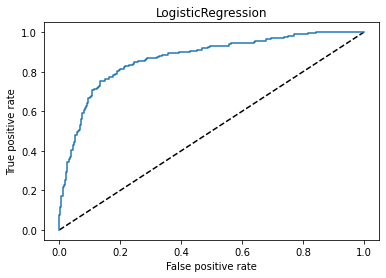

0.8035894759514224

In [604]:
y2_pred_prob = LR.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='LogisticRegression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LogisticRegression')
plt.show()
auc_score = roc_auc_score(y2_test,LR.predict(x2_test))
auc_score

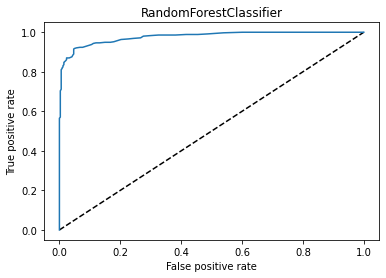

0.9232980433089782

In [605]:
y2_pred_prob = RFC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,RFC.predict(x2_test))
auc_score

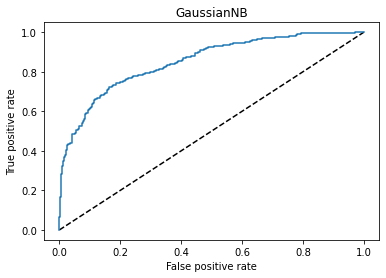

0.7637846480110012

In [606]:
y2_pred_prob = GB.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GaussianNB')
plt.show()
auc_score = roc_auc_score(y2_test,GB.predict(x2_test))
auc_score

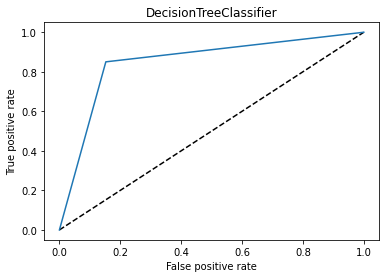

0.8488949086270028

In [607]:
y2_pred_prob = DTC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,DTC.predict(x2_test))
auc_score

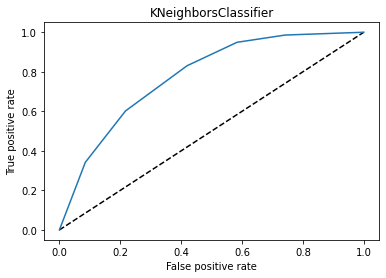

0.7055768179332969

In [608]:
y2_pred_prob = KNC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('KNeighborsClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,KNC.predict(x2_test))
auc_score

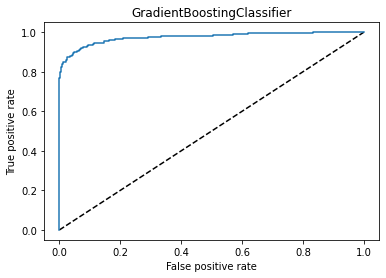

0.9188453700482131

In [609]:
y2_pred_prob = GBC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('GradientBoostingClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,GBC.predict(x2_test))
auc_score

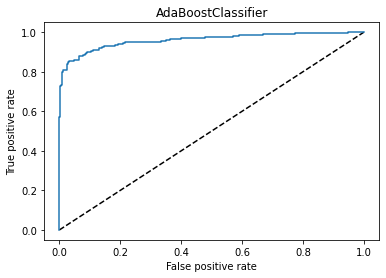

0.9023932601023906

In [610]:
y2_pred_prob = ABC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('AdaBoostClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,ABC.predict(x2_test))
auc_score

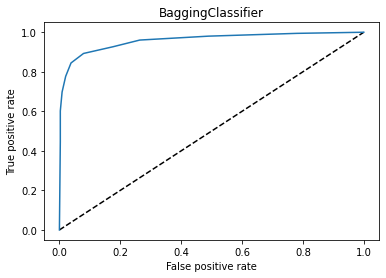

0.9032548006030784

In [611]:
y2_pred_prob = BC.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='BaggingClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('BaggingClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,BC.predict(x2_test))
auc_score

### Observations

Based on Model Evaluation RandomForestClassifier is performing well with accuracy score of 92%, 
Cross validation score of 90% and roc_auc_score of 92% which is good compared with other Models

Let's proceed with Hyper Parameter Tuning to enhance the Model

# Hyper Parameter Tuning

In [612]:
from sklearn.model_selection import GridSearchCV

In [613]:
grid_params={'n_estimators':[100,150],'criterion':['gini','entropy','log_loss'],
            'max_depth':[50,100,150],'min_samples_split':[2,4,5]}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x2_train,y2_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [50, 100, 150],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [100, 150]})
Best Score 0.9087008547008548
Best Params {'criterion': 'entropy', 'max_depth': 50, 'min_samples_split': 2, 'n_estimators': 150}


# Final Model Classification

In [614]:
Final_Model = RandomForestClassifier(n_estimators =150, criterion = 'entropy',max_depth=50,min_samples_split=2)
                                       
Final_Model.fit(x2_train,y2_train)
print(Final_Model.score(x2_train,y2_train))
pred = Final_Model.predict(x2_test)
cr10 = cross_val_score(Final_Model,x2,y2,cv=5)

print(accuracy_score(y2_test,pred)*100)
print(confusion_matrix(y2_test,pred))
print(classification_report(y2_test,pred))
print('CV score of RandomForestClassifier:',cr10.mean()*100)

1.0
92.08633093525181
[[332   9]
 [ 46 308]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       341
           1       0.97      0.87      0.92       354

    accuracy                           0.92       695
   macro avg       0.92      0.92      0.92       695
weighted avg       0.93      0.92      0.92       695

CV score of RandomForestClassifier: 90.03816936024428


### AUC_ROC_CURVE

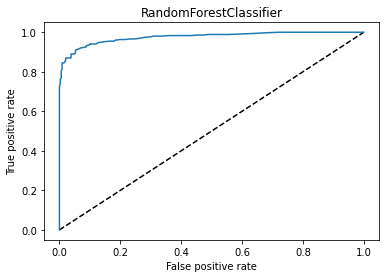

0.9218317676491542

In [615]:
y2_pred_prob = Final_Model.predict_proba(x2_test)[:,1]
fpr,tpr,thresholds = roc_curve(y2_test,y2_pred_prob,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RandomForestClassifier')
plt.show()
auc_score = roc_auc_score(y2_test,Final_Model.predict(x2_test))
auc_score

### Observation

Based on Accuracy Score 92% Vs Cross Validation Score 90% Vs AUC_ROC_Curve 92%

Concluding Random Forest Classifier Model is the best fit model for classification to predict the 'Attrition'
for HR Analytics dataset

# Saving the Final model - RandomForestClassifier

In [616]:
# Saving the model using .pkl

import joblib
joblib.dump(Final_Model,"HR_attrition_pred.pkl")

['HR_attrition_pred.pkl']

# Predicting the Model

In [617]:
# Loading the saved model

Model=joblib.load("HR_attrition_pred.pkl")

#Prediction
prediction = Model.predict(x2_test)
prediction

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,

In [618]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x2_test)[:],y2_test[:]],index=["Predicted","Original"]).T

,Predicted,Original
0,1,1
1,0,0
2,1,1
3,0,0
4,1,1
5,1,1
6,0,0
7,1,1
8,0,1
9,1,1


### Conclusion

RandomForestClassifier Model which was built on the HR Analytics dataset to predict the 'Attrition' of 
employees is performing good as we can see, Original Vs Predicted value is same, which shows the developed Model
is performing well with the given dataset.

To conclude we can say most of the attritions are coming from employees with low monthly income, employees with 
more number of years on the same position and less job involvement.

We can control attrition by taking employee engagement survey with employees quarterly to find their pulse in the 
organization with these similar questionaire and then with the built Model we can predict the attrition.

Thank you for Providing the opportunity to work on the Avocado case study dataset.